In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

In [2]:
path1 = Path("../data/external/batch1.pkl")
batch1 = pickle.load(open(path1, 'rb'))

#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

# 1 Cell

In [5]:
# this is all data for cell 0 from batch 1
# The cleaned data set from all 3 batches contains 124 cells
batch1["b1c0"].keys() 

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

## Dict structure
1. Cell<br>
    1.1 Cycle Life<br>
    1.2 Charge Policy<br>
    1.3 Summary (per charging cycle)
        1.3.1 Internal Resistance (Ω)
        1.3.2 Total Quantity of Charge (Ah)
        1.3.3 Total Quantity of Discharge (Ah)
        1.3.4 Temp Avg (C°)
        1.3.5 Temp min (C°)
        1.3.6 Temp Max (C°)
        1.3.7 Charge time (minutes)
        1.3.8 Cycle no. (Int)
    1.4 Cycle (all data points per cycle)
        1.4.1 Current (C-Rate)
        1.4.2 Quantity of Charge (Ah)
        1.4.3 Quantity of Discharge (Ah)
        1.4.4 Qdlin (?)
        1.4.5 Temperature (C°)
        1.4.6 Tdlin (?)
        1.4.7 Voltage (V)
        1.4.8 dQdV (?)
        1.4.9 Time elapsed (minutes)    

# 1.1 Cycle Life

In [6]:
batch1["b1c0"]["cycle_life"] # total number of cycles measured

array([[1190.]])

# 1.2 Charge Policy

In [7]:
"""
A C-rate is a measure of the rate at which a battery is discharged relative to its maximum capacity.
A 1C rate means that the discharge current will discharge the entire battery in 1 hour.
For a battery with a capacity of 100 Amp-hrs, this equates to a discharge current of 100 Amps.
A 5C rate for this battery would be 500 Amps, and a C/2 rate would be 50 Amps.
We have a C3.6 rate that's 360 Ampere.
After the battery has been charged to 80% the second part of the charging policy takes effect"""
batch1["b1c0"]["charge_policy"]

'3.6C(80%)-3.6C'

# 1.3 Summary (for each charging cycle)

In [8]:
batch1["b1c0"]["summary"].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

### 1.3.1 Internal Resistance

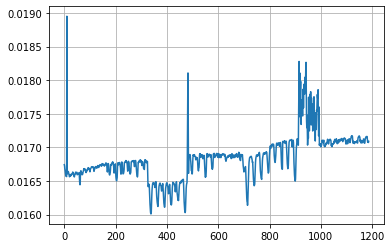

In [9]:
# Measured in Ohm
cleaned_I = [i for i in batch1["b1c0"]["summary"]["IR"] if i > 0.01]
plt.grid()
plt.plot(cleaned_I)
plt.show()

### 1.3.2/3 Quantity of charge/discharge

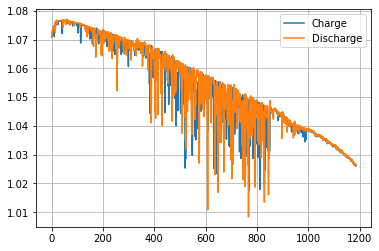

In [10]:
# Q is used to denote a quantity of electricity or charge. Measured in Ah.
cleaned_QC = [i for i in batch1["b1c0"]["summary"]["QC"] if 1.5 > i > 0.5]
cleaned_QD = [i for i in batch1["b1c0"]["summary"]["QD"] if 1.5 > i > 0.5]
plt.plot(cleaned_QC, label="Charge")
plt.plot(cleaned_QD, label="Discharge")
plt.legend()
plt.grid()
plt.show()

### 1.3.4/5/6 Temperature mean/min/max

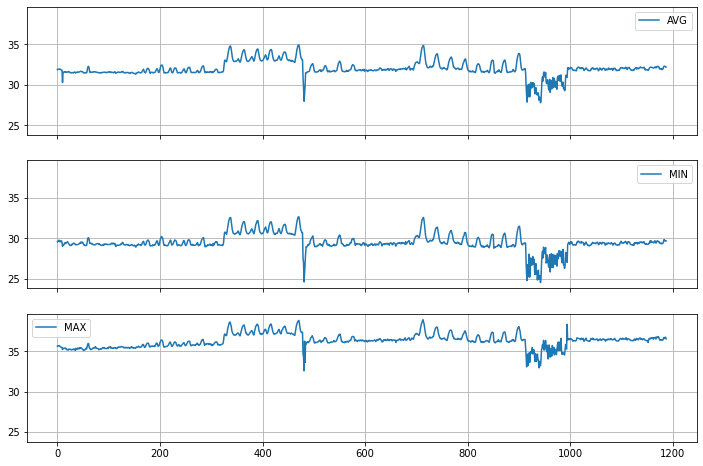

In [11]:
# measured in Celcius?
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12,8))
ax1.plot(batch1["b1c0"]["summary"]["Tavg"][1:], label="AVG")
ax2.plot(batch1["b1c0"]["summary"]["Tmin"][1:], label="MIN")
ax3.plot(batch1["b1c0"]["summary"]["Tmax"][1:], label="MAX")
ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()
plt.show()

### 1.3.7 Charge time

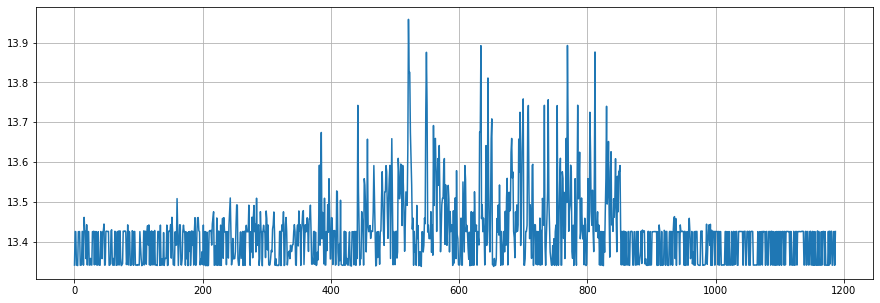

In [12]:
# measured in minutes?
plt.figure(figsize=(15,5))
cleaned_chargetime = [i for i in batch1["b1c0"]["summary"]["chargetime"] if i > 5]
plt.plot(cleaned_chargetime)
plt.grid()
plt.show()

### 1.3.8 Cycle number

In [13]:
list(batch1["b1c0"]["summary"]["cycle"])[0:10] # Number/index of charging cycle

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# 1.4 Cycles

In [14]:
list(batch1["b1c0"]["cycles"].keys())[-10:-1] # For this cell they measured 1188 charging cycles

['1179', '1180', '1181', '1182', '1183', '1184', '1185', '1186', '1187']

### Get all data from one exemplary charging cycle, e.g. #1054

In [15]:
for key, val in batch1["b1c0"]["cycles"]["1054"].items():
    print("%s\t%s" % (key, len(val)))

I	1051
Qc	1051
Qd	1051
Qdlin	1000
T	1051
Tdlin	1000
V	1051
dQdV	1000
t	1051


### 1.4.1 I (current in C)

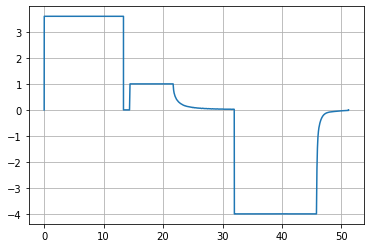

In [16]:
"""
The cell is fast charged with 4C until ~80%, then slowly full charged with 1C. 
Discharging happens with constant 4C.
For explanation of charging policy see 1.2.
"""
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["I"])
plt.grid()
plt.show()

### 1.4.2/3 Qc (charge) and Qd (discharge) in Ah

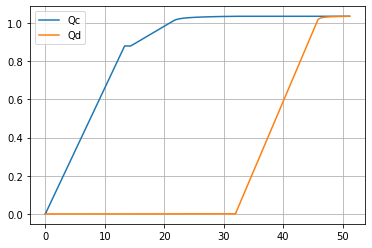

In [17]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["Qc"], label="Qc")
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["Qd"], label="Qd")
plt.grid()
plt.legend()
plt.show()

In [18]:
# Last Cycle Measurements are recorded in Summary for Cell Cycle
print('Qd last cycle', batch1["b1c0"]["cycles"]["1054"]["Qd"][-1])
print('QD summary', batch1["b1c0"]["summary"]["QD"][1054])
print('Qc last cycle', batch1["b1c0"]["cycles"]["1054"]["Qc"][-1])
print('QC summary', batch1["b1c0"]["summary"]["QC"][1054])

Qd last cycle 1.035984
QD summary 1.035984
Qc last cycle 1.0357687
QC summary 1.0357687


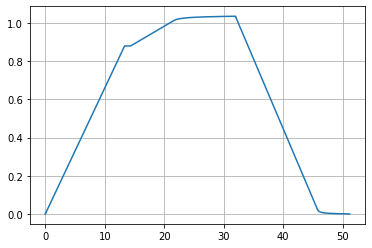

In [19]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["Qc"] - batch1["b1c0"]["cycles"]["1054"]["Qd"])
plt.grid()
plt.show()

### 1.4.4 Qdlin

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_T(cell=1, cycle=2):
    f, ax = plt.subplots(nrows=2, figsize=(4, 8))
    ax[0].plot(
        batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["t"],
        batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["T"]
    );
    ax[0].grid()
    ax[0].set_ylim([29,36])
    print("T min: ", np.min(batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["T"]))
    print("T max: ", np.max(batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["T"]))

    
    ax[1].plot(
        batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["Tdlin"]
    );
    ax[1].grid()
    ax[1].set_ylim([29,36])
    print("Tdlin min: ", np.min(batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["Tdlin"]))
    print("Tdlin max: ", np.max(batch1[f"b1c{cell}"]["cycles"][f"{cycle}"]["Tdlin"]))
    
interact(
    plot_T,
    cell=widgets.IntSlider(value=0, description='cell', max=40, min=0),
    cycle=widgets.IntSlider(value=1, description='cycle', max=100, min=1)
);

interactive(children=(IntSlider(value=0, description='cell', max=40), IntSlider(value=1, description='cycle', …

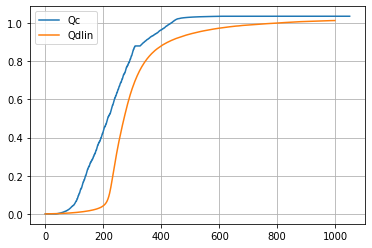

In [21]:
# Is Qdlin a smoothed out version of Qc?
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Qc"], label="Qc")
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Qdlin"], label="Qdlin")
plt.grid()
plt.legend()
plt.show()

### 1.4.5 T (temperature in Celsius)

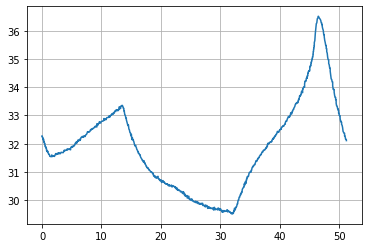

In [22]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["T"])
plt.grid()
plt.show()

### 1.4.6 Tdlin

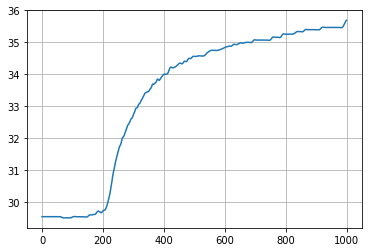

In [23]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Tdlin"])
plt.grid()
plt.show()

### 1.4.7 V (Volt)

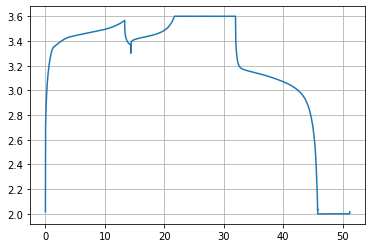

In [24]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"], batch1["b1c0"]["cycles"]["1054"]["V"])
plt.grid()
plt.show()

### 1.4.8 dQdV

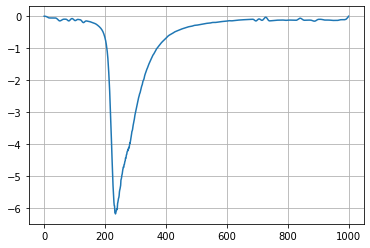

In [25]:
plt.plot(batch1["b1c0"]["cycles"]["1054"]["dQdV"])
plt.grid()
plt.show()

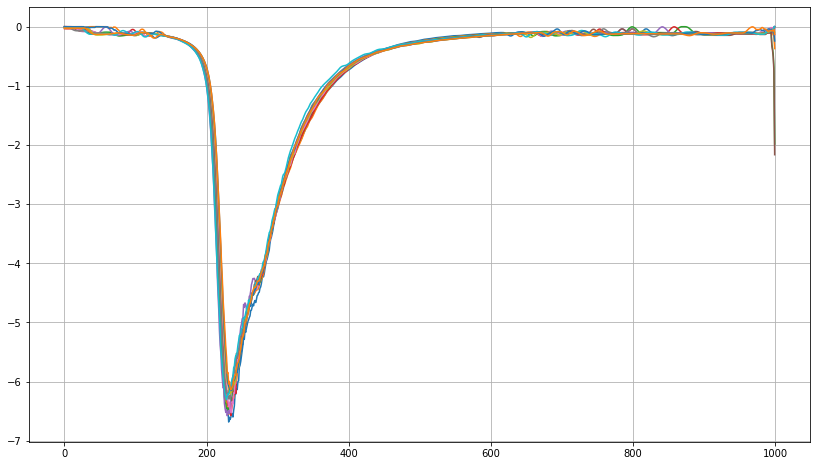

In [26]:
plt.figure(figsize=(14,8))

keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(batch1["b1c0"]["cycles"][key]["dQdV"])

plt.grid()    
plt.show()

In [27]:
# plot dQdV's for one test cell
dqdv_sample = batch1["b1c0"]

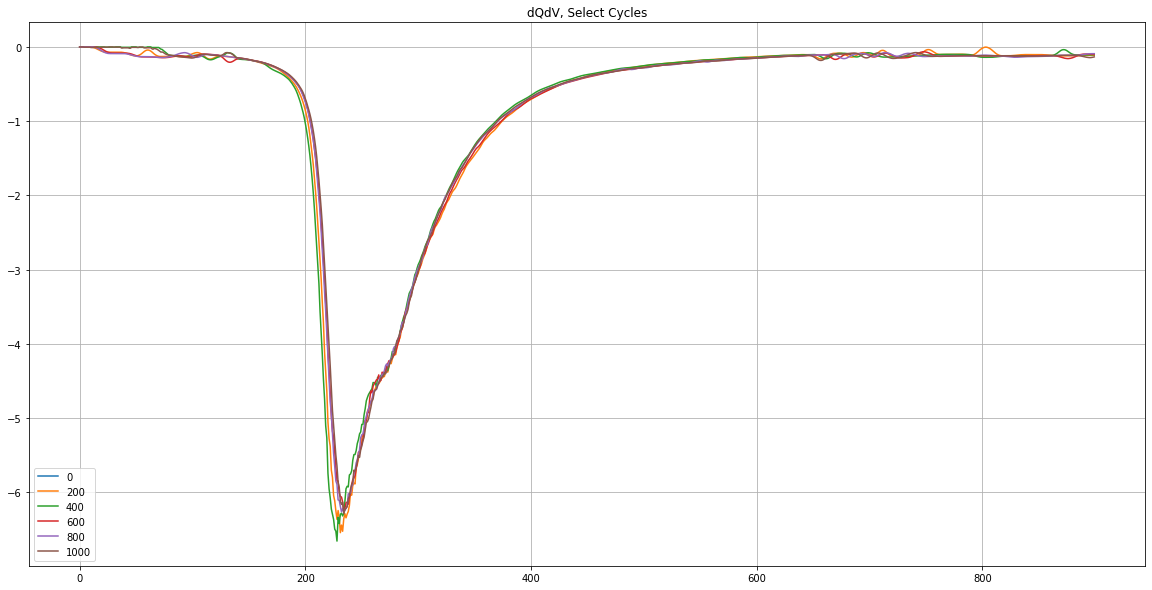

In [28]:
plt.figure(figsize=(20,10))
for i, cycle in dqdv_sample["cycles"].items():
    if int(i) % 200 == 0:
        plt.plot(cycle["dQdV"][:900], label=i)
plt.title('dQdV, Select Cycles')
plt.legend()
plt.grid()
plt.show()

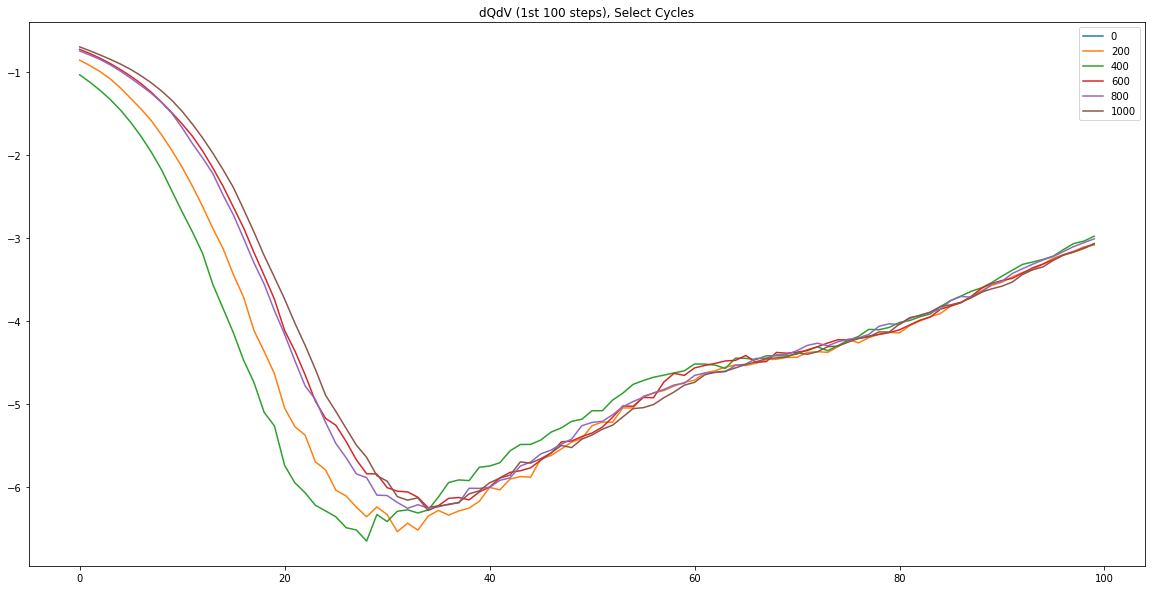

In [29]:
plt.figure(figsize=(20,10))
for i, cycle in dqdv_sample["cycles"].items():
    if int(i) % 200 == 0:
        plt.plot(cycle["dQdV"][200:300], label=i)
plt.title('dQdV (1st 100 steps), Select Cycles')
plt.legend()
plt.show()

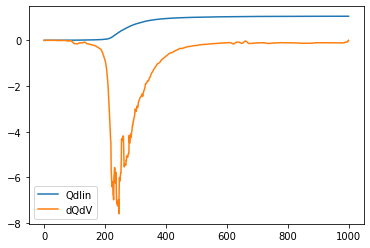

In [30]:
# dQdV, Qdlin:  what is the relationship between these two?
plt.plot(batch1['b1c43']['cycles']['10']['Qdlin'], label='Qdlin')
plt.plot(batch1['b1c43']['cycles']['10']['dQdV'], label='dQdV')
plt.legend()
plt.show()

### 1.4.9 t (time)

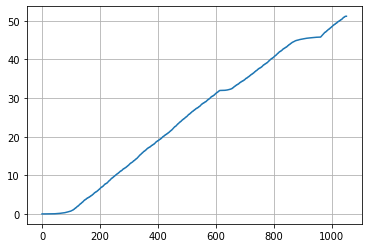

In [31]:
# time elapsed at each step
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"])
plt.grid()
plt.show()

In [32]:
# time consists of float numbers that represent minutes
list(batch1["b1c0"]["cycles"]["1054"]["t"])[-10:-1]

[50.89044999999994,
 50.97384833333344,
 50.97385000000019,
 51.057265000000186,
 51.14065166666696,
 51.1821166666666,
 51.18211833333335,
 51.183168333333256,
 51.19381999999993]

# Additional graphs

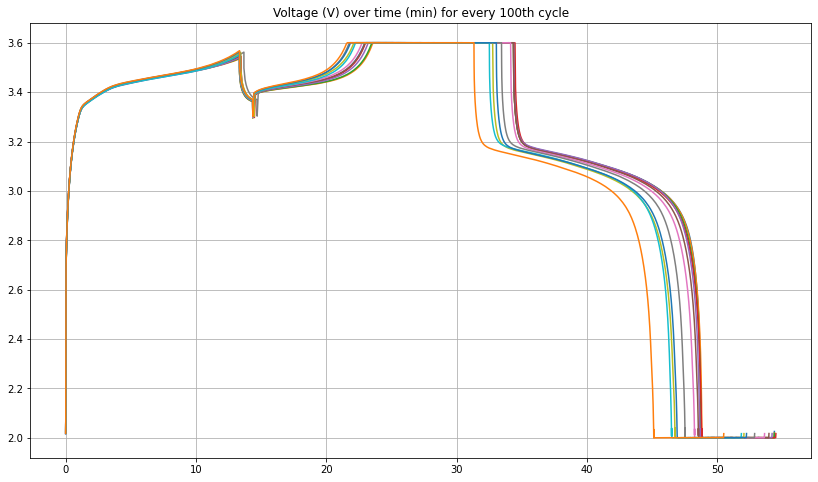

In [33]:
plt.figure(figsize=(14,8))

keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(batch1["b1c0"]["cycles"][key]["t"], batch1["b1c0"]["cycles"][key]["V"])
plt.title("Voltage (V) over time (min) for every 100th cycle")
plt.grid()    
plt.show()

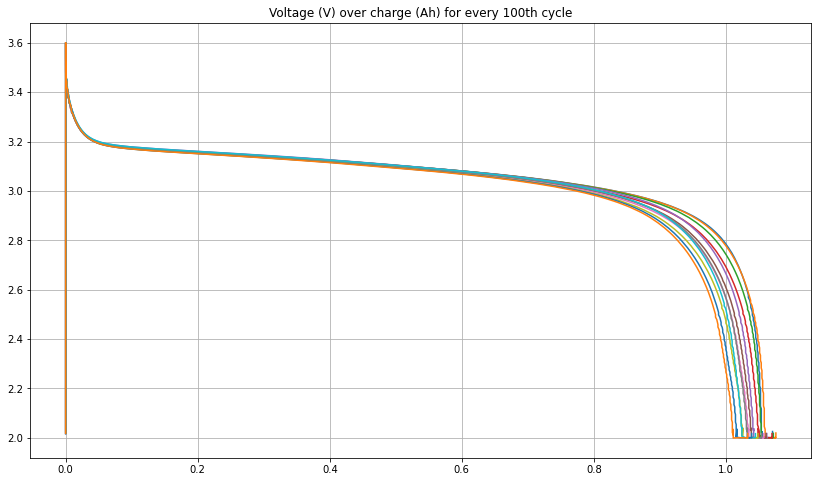

In [34]:
plt.figure(figsize=(14,8))

keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(batch1["b1c0"]["cycles"][key]["Qd"], batch1["b1c0"]["cycles"][key]["V"])
plt.title("Voltage (V) over charge (Ah) for every 100th cycle")
plt.grid()    
plt.show()

In [35]:
import pandas as pd
import seaborn as sns

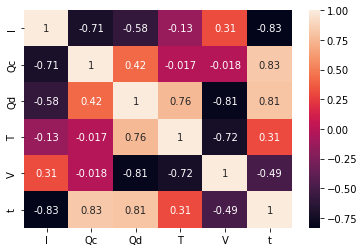

In [36]:
cycle_df = {k: batch1["b1c0"]["cycles"]["1054"][k] for k in ('I', 'Qc', 'Qd', 'T', 'V', 't')}
cycle_df = pd.DataFrame.from_dict(cycle_df)
sns.heatmap(cycle_df.corr(), annot=True)
plt.show()

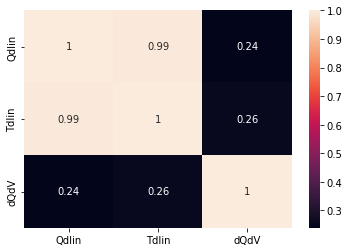

In [37]:
lin_df = {k: batch1["b1c0"]["cycles"]["1054"][k] for k in ('Qdlin', 'Tdlin', 'dQdV')}
lin_df = pd.DataFrame.from_dict(lin_df)
sns.heatmap(lin_df.corr(), annot=True)
plt.show()

Tdlin and Qdlin are on different scales but have almost the same form. Why are they so highly correlated? 

# Continue original notebook

In [38]:
path2 = Path("../data/external/batch2.pkl")
batch2 = pickle.load(open(path2, 'rb'))

In [39]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [40]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [41]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [42]:
numBat2 = len(batch2.keys())
numBat2

43

In [43]:
path3 = Path("../data/external/batch3.pkl")
batch3 = pickle.load(open(path3, 'rb'))

# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [44]:
numBat3 = len(batch3.keys())
numBat3

40

In [45]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [46]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

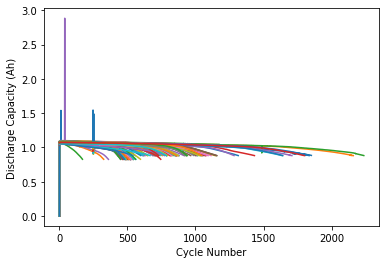

In [47]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [48]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);